HOUSE PRICE PREDICTION USING LINEAR REGRESSION - AMRUTH SAI MUDIVARTHI

1. Importing Libraries and Dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
rawdata=pd.read_csv("C:/Users/M Amruth Sai/Downloads/Python Practice/Housing.csv")
rawdata.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2. Preprocessing the Dataset

In [97]:
columns=rawdata.columns[0:4]
data=rawdata[columns]
data

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


In [99]:
x=data[['bedrooms','bathrooms','area']]
print(x)

     bedrooms  bathrooms  area
0           4          2  7420
1           4          4  8960
2           3          2  9960
3           4          2  7500
4           4          1  7420
..        ...        ...   ...
540         2          1  3000
541         3          1  2400
542         2          1  3620
543         3          1  2910
544         3          1  3850

[545 rows x 3 columns]


In [100]:
y=data[['price']]
print(y)

        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]


3. Splitting Dataset Into Train and Test Sets

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)


In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(363, 3)
(182, 3)
(363, 1)
(182, 1)


4. Applying Linear Regression Algorithm

In [103]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [104]:
y_pred=regression.predict(x_test)
print(y_pred)

[[ 3990745.14830368]
 [ 6325479.68794705]
 [ 4263444.45821812]
 [ 7315697.28203899]
 [ 4346531.09663959]
 [ 6333340.68840428]
 [ 3928430.16948758]
 [ 3774719.88840785]
 [ 3290980.51690288]
 [ 7931271.88114119]
 [ 6684972.30481911]
 [ 3974127.82061938]
 [ 3762256.89264463]
 [ 4846537.52404484]
 [ 4815380.03463679]
 [ 3338515.03669512]
 [ 3867601.78754789]
 [ 4829920.19636055]
 [ 3616855.27540705]
 [ 3701428.51070495]
 [ 7081120.43419753]
 [ 6374884.00761501]
 [ 4406178.34041104]
 [ 3035248.80645675]
 [ 4996093.47320349]
 [ 5003954.47366072]
 [ 5237044.72462576]
 [ 4688672.91104405]
 [ 6432596.99112513]
 [ 4996093.47320349]
 [ 3659885.19149421]
 [ 3274122.89191848]
 [ 5818651.19357607]
 [ 3510329.24233556]
 [ 3625163.9392492 ]
 [ 4507368.90339323]
 [ 5318644.76617081]
 [ 3590267.55111218]
 [ 2768190.42533981]
 [ 3232579.57270775]
 [ 7226522.0514351 ]
 [ 6643428.98560838]
 [ 6104852.43274523]
 [ 4611817.77050418]
 [ 3791337.21609215]
 [ 6187939.0711667 ]
 [ 4057214.45904086]
 [ 3510329.24

5. Evaluating the Model & Visualizations

In [115]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(f" Accuracy of the model is : {Accuracy}%")

 Accuracy of the model is : 51.80445199716317%


Text(0, 0.5, 'Predicted')

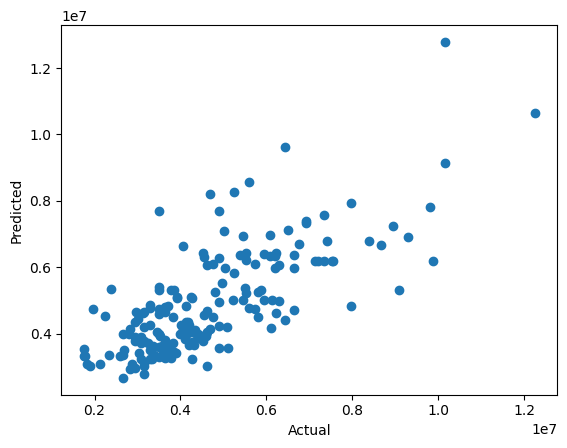

In [107]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

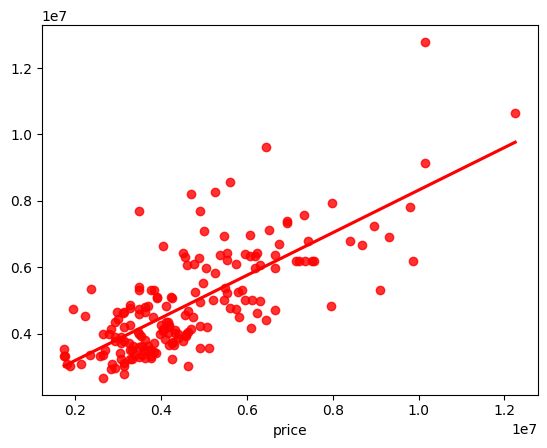

In [108]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [109]:
print(regression.intercept_)
print(regression.coef_)

[-528414.8597313]
[[4.97033234e+05 1.36632754e+06 4.15433192e+02]]


6. House Price Prediction with User Interaction

In [116]:
intercept = -528414.8597313
coefficients = [4.97033234e+05, 1.36632754e+06, 4.15433192e+02]
#The parameters were taken according to the given dataset, if any other dataset is used kindly change the parameters - Amruth Sai

def predict_price(x1, x2, x3):
    return intercept + coefficients[0] * x1 + coefficients[1] * x2 + coefficients[2] * x3

x1 = int(input("Enter Number of Bedrooms :")) 
x2 = int(input("Enter Number of Bathrooms : ")) 
x3 = int(input("Enter Area(sqft) : ")) 

predicted_price = predict_price(x1, x2, x3)
print(f"Predicted House Price: {predicted_price}")


Predicted House Price: 3078278.7242687
